# ガラーキン法で微分方程式を解いてみよう

以下の微分方程式を解いてみる．
\begin{eqnarray}
    \frac{d^2 y}{dx^2} + y + x = 0 ~~ (0 \leq x \leq 1)
\end{eqnarray}

この厳密解は，
\begin{eqnarray}
    y(x) = \frac{\sin x}{\sin 1} -x
\end{eqnarray}
である．実際に厳密解をもとに微分方程式に代入してみると，
\begin{eqnarray}
    \frac{d^2}{dx^2}\left(\frac{\sin x}{\sin 1} -x\right) + \frac{\sin x}{\sin 1} -x + x = 0
\end{eqnarray}
である．

\begin{eqnarray}
    y(0) = 0, ~~ y(1)=0
\end{eqnarray}

\begin{eqnarray}
    y'(0) = \frac{1}{\sin 1}, ~~ y'(1)=\cot(1)-1
\end{eqnarray}

## ガラーキン法とは？
ガラーキン法とは，残差関数と重み関数の基底が同一の重み付き残差法である．
重み付き残差法とは，残差関数と重み関数の畳み込みが０になるような解を近似解として求める数値計算手法である．ガラーキン法以外にも，選点法はある点(選点)においてのみ解が微分方程式を満たすようにする方法で，重み関数はδ関数である．これは，ある区間で解が平均的に厳密解に近いということを表している．

In [1]:
import numpy as np

In [3]:
def exact_solution(x):
    return np.sin(x)/np.sin(1)-x

def differential(func,x,dx=0.001):
    return (func(x+dx)-func(x-dx))/(2*dx)

def second_differential(func,x,dx=0.001):
    return (func(x+dx)-2*func(x)+func(x-dx))/(dx**2)

def residual_function_u(func,x):
    """
    part of the residual function which depends on trial solution
    """
    return second_differential(func,x,dx=0.001)+func(x)

def residual_function_n(func,x):
    """
    part of the residual function which NOT depends on trial solution
    """
    return x

def simpson_integral(array,mode:int,x1:float,x2:float)->float:
    dx = (x2-x1)/len(array)
    area = 0
    if mode==0:
        area = np.sum(array)*dx
    elif mode==1:
        for i in range(len(array)-1):
            area += (array[i]+array[i+1]) *dx/2
    elif mode==2:
        for i in range(len(array)-2):
            area += (array[i]+4*array[i+1]*array[i+2]) *dx/6
    else:
        raise(NotImplementedError)
    return area

def inner_product(array1,array2,mode:int,x1:float,x2:float)->float:
    if len(array1)!=len(array2):
        raise(IndexError)
    else:
        array=array1*array2
        return simpson_integral(array,mode,x1,x2)

def basis0(x):
    return x*(1-x)

def basis1(x):
    return x*(1-x)*x

def func_array(func,x_array):
    if type(x_array)!=numpy.ndarray:
        raise(TypeError)
    return func(x)

In [4]:
x1,x2,dev=0,1,1001
x_array = np.linspace(x1,x2,dev)

#basis_array = [basis0(x),basis1(x)]
basis = [basis0,basis1]

def galerkin_coeff(basis:list,x_array):
    N = len(basis)
    matrix=[]
    vec_b=[]
    basis_array=[]
    for vi in basis:
        basis_array.append(vi(x_array))
    for i in range(N):
        rui_array = residual_function_u(basis[i],x_array)
        for j in range(N):
            inner_prod = inner_product(array1=rui_array,array2=basis_array[j],mode=1,x1=0,x2=1)
            matrix.append(inner_prod)
        rni_array = residual_function_n(basis_array[i],x_array)
        inner_prod = inner_product(array1=rni_array,array2=basis_array[i],mode=1,x1=0,x2=1)
        vec_b.append(inner_prod)
    vec_b = np.array(vec_b)
    matrix = np.array(matrix)
    matrix = matrix.reshape([N,N])
    return np.linalg.inv(matrix) @ vec_b *(-1)

list_gc = galerkin_coeff(basis,x_array)

def galerkin_solution(x_array,dev):
    sol = np.array([0.0]*dev)
    for i in range(len(basis)):
        sol += list_gc[i]*basis[i](x_array)
    return sol

array_gc = galerkin_solution(x_array,dev)

print (array_gc)

[0.         0.00019239 0.00038474 ... 0.00072415 0.00036261 0.        ]


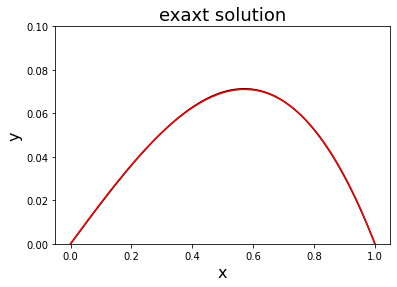

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,1,dev)
y1=exact_solution(x)
y2=galerkin_solution(x_array,dev)
plt.title('exaxt solution',size=18)
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.ylim([0,0.1])
plt.plot(x,y1,color='black')
plt.plot(x,y2,color='red')
plt.show()